In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import os
import zipfile

In [31]:
%%time

def unzip(zip_file_path,output_dir_path):
    with zipfile.ZipFile(zip_file_path,"r") as zip:
        zip.extractall(output_dir_path)
    print("data uncompressed successfully.....")
    print()

zip_file_path = r"C:/Users/chukk/OneDrive/Desktop/ML Project/txt_reviews.zip"
output_dir_path = r"C:/Users/chukk/OneDrive/Desktop/ML Project/ext_txt_reviews.zip"
    
unzip(zip_file_path,output_dir_path)

data uncompressed successfully.....

CPU times: total: 3min
Wall time: 8min 37s


In [32]:
from tqdm import tqdm

def read_text_files(output_dir_path):
    """
    Reads all .txt files from the specified directory using os.walk and returns a DataFrame.
    Each row in the DataFrame contains the file name and its content details.
    """
    files_data = []

    # Gather all file paths first
    all_files = []
    for root, dirs, files in os.walk(output_dir_path):
        for file_name in files:
            if file_name.endswith(".txt"):
                all_files.append(os.path.join(root, file_name))
    
    # Use tqdm to show progress
    for file_path in tqdm(all_files, desc="Reading Text Files"):
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                file_content = f.read().strip().split('\n') 
                file_data = {}
                for line in file_content:
                    key, value = line.split(': ', 1)
                    file_data[key] = value
                file_data['file_name'] = os.path.basename(file_path)
                files_data.append(file_data)
        except UnicodeDecodeError as e:
            print(f"Error reading {file_path}: {e}")
    return files_data
 

def load_into_df(files_data):
    df = pd.DataFrame(files_data)
    return df

In [52]:
%%time

files_data = read_text_files(output_dir_path)
df = load_into_df(files_data)

df.head()

Reading Text Files: 100%|████████████████████████████████████████████████████| 568454/568454 [04:54<00:00, 1930.86it/s]


CPU times: total: 1min 42s
Wall time: 5min 32s


,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt


In [34]:
df = pd.read_csv(r"C:/Users/chukk/OneDrive/Documents/python/innomatics python/class/MACHINE LEARNING/Sentiment_analysis_un.csv")

In [53]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,file_name
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,review_1.txt
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,review_10.txt
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,review_100.txt
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",review_1000.txt
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,review_10000.txt


In [54]:
df1 = df.drop(["file_name"],axis=1,inplace = True)

In [55]:
df1 = df

In [56]:
df1.shape

(568454, 9)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  object
 4   HelpfulnessDenominator  568454 non-null  object
 5   Score                   568454 non-null  object
 6   Time                    568454 non-null  object
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: object(9)
memory usage: 39.0+ MB


In [58]:
%%time
df1["HelpfulnessNumerator"]=df1['HelpfulnessNumerator'].astype('int')

CPU times: total: 62.5 ms
Wall time: 80.9 ms


In [59]:
df1["HelpfulnessDenominator"]=df1['HelpfulnessDenominator'].astype('int')

In [60]:
df1['Score']=df1['Score'].astype('int')

In [61]:
df1['Time']=df1['Time'].astype('int')

In [62]:
df1.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int32 
 4   HelpfulnessDenominator  568454 non-null  int32 
 5   Score                   568454 non-null  int32 
 6   Time                    568454 non-null  int32 
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int32(4), object(5)
memory usage: 30.4+ MB


In [65]:
df1.to_csv('Sentiment_analysis121.csv')

In [67]:
df1 = pd.read_csv("C:/Users/chukk/OneDrive/Documents/python/innomatics python/class/MACHINE LEARNING/Sentiment_analysis121.csv")

In [68]:
df1.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [69]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [70]:
df1['Helpfulness']=df1['HelpfulnessNumerator']/df1['HelpfulnessDenominator']

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568428 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Helpfulness             298402 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [72]:
df1[df1['ReviewText'].isna()==True]

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness


In [74]:
df1['Helpfulness'].fillna(0,inplace=True)

C:\Users\chukk\AppData\Local\Temp\ipykernel_18080\2220035033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Helpfulness'].fillna(0,inplace=True)


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568428 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Helpfulness             568454 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 43.4+ MB


In [76]:
def score_review(score):
    if score==4 or score==5:
        return "Positive"
    elif score==3:
        return "Neutral"
    else:
        return "Negative"

In [77]:
df1['Sentiment']=df1['Score'].apply(score_review)

In [78]:
df1.isna().sum()

ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             27
ReviewText                 0
Helpfulness                0
Sentiment                  0
dtype: int64

In [79]:
df['ProfileName'].fillna(' ',inplace=True)
df['ReviewSummary'].fillna(' ',inplace=True)
df["ReviewText"].fillna(' ',inplace=True)

C:\Users\chukk\AppData\Local\Temp\ipykernel_18080\3033107942.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProfileName'].fillna(' ',inplace=True)
C:\Users\chukk\AppData\Local\Temp\ipykernel_18080\3033107942.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   ProfileName             568428 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  int64  
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
 9   Helpfulness             568454 non-null  float64
 10  Sentiment               568454 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 47.7+ MB


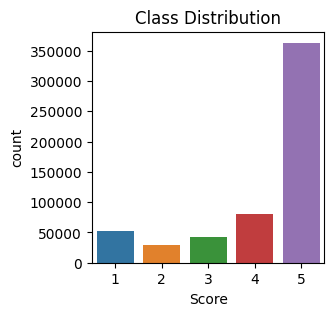

In [81]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Class Distribution")
sns.countplot(data=df1, x='Score')

plt.show()

# 2.b. Visualizing the distribution of most frequent words

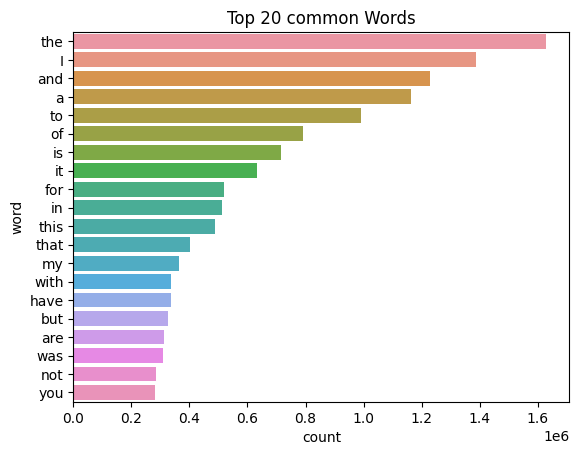

In [82]:
from collections import Counter
all_words = " ".join(df1['ReviewText'].values).split()
word_counts=Counter(all_words)
common_words=word_counts.most_common(20)

most_common_df=pd.DataFrame(common_words,columns=['word','count'])

sns.barplot(data=most_common_df,y='word',x='count')
plt.title("Top 20 common Words")
plt.show()

<Axes: xlabel='Sentiment', ylabel='count'>

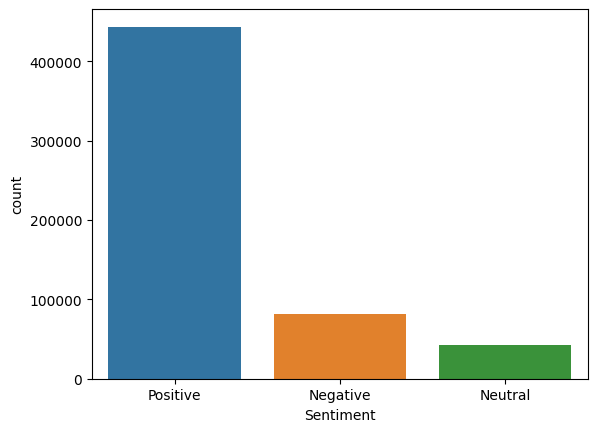

In [83]:
sns.countplot(data=df1, x='Sentiment')

In [84]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


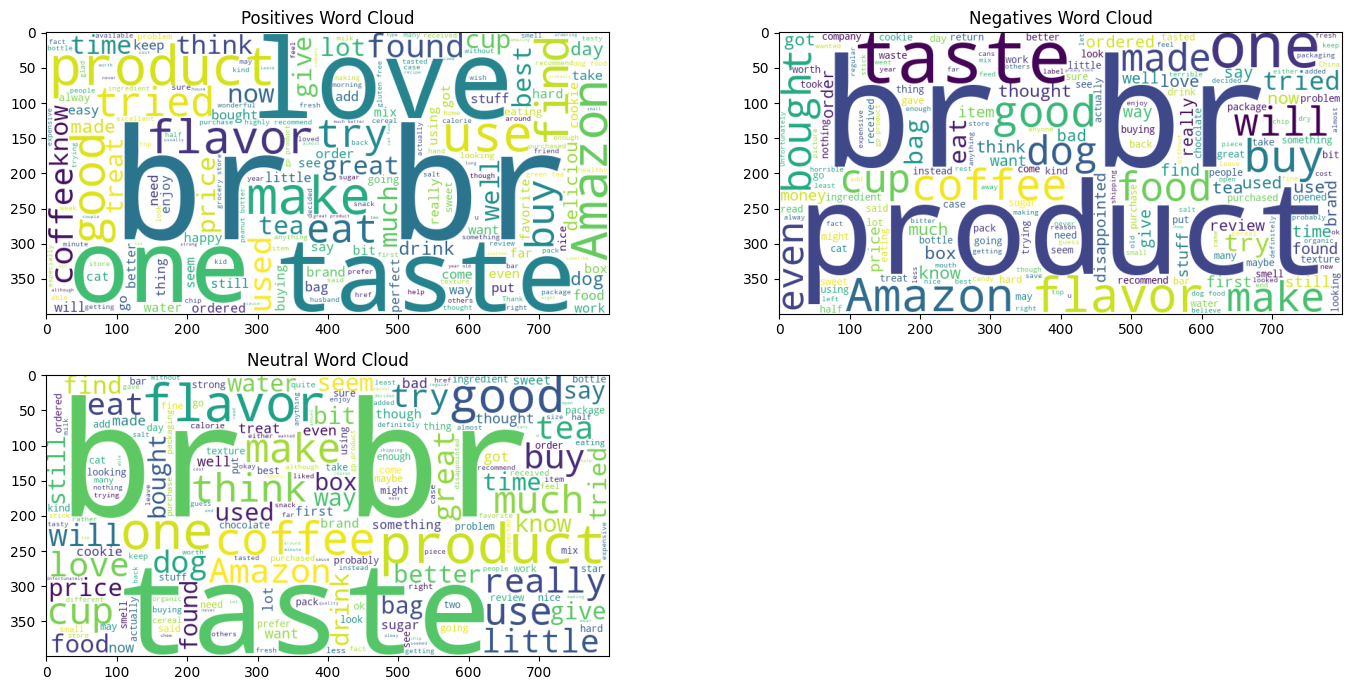

In [85]:
# Wordcloud
from wordcloud import WordCloud

positives_text = ' '.join(df1[df1['Sentiment']=='Positive']['ReviewText'].values)
positive_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(positives_text)

negatives_text = ' '.join(df1[df1['Sentiment']=='Negative']['ReviewText'].values)
negative_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(negatives_text)

neutrals_text = ' '.join(df1[df1['Sentiment']=='Neutral']['ReviewText'].values)
neutral_text_word_cloud = WordCloud(width=800,height=400,background_color='white').generate(neutrals_text)

fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.flatten()

ax[0].imshow(positive_text_word_cloud)
ax[0].set_title("Positives Word Cloud")

ax[1].imshow(negative_text_word_cloud)
ax[1].set_title("Negatives Word Cloud")

ax[2].imshow(neutral_text_word_cloud)
ax[2].set_title('Neutral Word Cloud')

fig.delaxes(ax[3])
fig.tight_layout()
plt.show()


# SPRINT 2 - Build a model

## Step-3 Segregate input and output

In [86]:
X=df1[['ReviewText']]
y=df1['Sentiment']

# step -  4 train test split

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=7)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(426340, 1) (426340,)
(142114, 1) (142114,)


# Step-5 Data Preprocessing

In [88]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [89]:
def clean(doc):
    regex="[^a-zA-Z.]"
    doc=re.sub(regex, ' ', doc)
    
    doc=doc.lower()
    
    tokens=nltk.word_tokenize(doc)
    
    stop_words=list(set(stopwords.words("english")))
    custom_stop_words = ['br','taste','product','love','flovour','one','buy','make']
    stop_words=stop_words+custom_stop_words
    
    filtered_token=[word for word in tokens if word  not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatizer_tokens = [lemmatizer.lemmatize(token) for token in filtered_token]
    
    return ' '.join(lemmatizer_tokens)

In [90]:
def tokenizer(doc):
    return nltk.word_tokenize(doc)

In [91]:
X_train['ReviewText']

554620    This tastes the way I remember caramel popcorn...
448180    A great cereal that help with regulation.  Tas...
171555    Ok so my cat loves the flavor will eat them li...
125009    I was surprised when this honeybush proved to ...
512286    I've had quite a few sencha powders in my time...
                                ...                        
315737    This mix makes a good bread or can also be use...
79463     THIS STUFF IS GREAT! IT IS GREAT TO USE IT WIT...
328599    I bought this flavor as an indulgent treat but...
535030    I haven't had the chance to test this salt on ...
189636    I used to buy the Martha White Honey Bran Muff...
Name: ReviewText, Length: 426340, dtype: object

## Data Preparation on Train data

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(token_pattern = None,
                                 tokenizer = tokenizer,
                                 ngram_range=(1,1),
                                 lowercase=False,
                                 preprocessor = clean,
                                 stop_words=None)

X_train_transformed = bow_vectorizer.fit_transform(X_train['ReviewText'])

print("Shape:", X_train_transformed.shape)

Shape: (426340, 97466)


# Data Preparation on Test data

In [93]:
X_test_transformed=bow_vectorizer.transform(X_test['ReviewText'])
print("Shape :", X_test_transformed.shape)

Shape : (142114, 97466)


## Task B

### Model Building & Evaluation

### 1. Naive Baye's Classifier

In [94]:
import time

In [95]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
start_time=time.time()
nb_classifier.fit(X_train_transformed, y_train)
end_time=time.time()
nb_time=end_time-start_time

start_time=time.time()
y_test_predict = nb_classifier.predict(X_test_transformed)
end_time=time.time()
nb_predict_time=end_time-start_time

nb_score=metrics.accuracy_score(y_test,y_test_predict)
print("Naive Bayes Accuracy :", nb_score)

nb_f_score = metrics.f1_score(y_test,y_test_predict,average='weighted')
print("Naive Baye's f1-score :", nb_f_score)

Naive Bayes Accuracy : 0.8351534683423167
Naive Baye's f1-score : 0.8317741668818152
CPU times: total: 1.5 s
Wall time: 3.25 s


### 2. Logistic Regression

In [96]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_reg = LogisticRegression()
start_time=time.time()
logistic_reg.fit(X_train_transformed, y_train)
end_time=time.time()
lr_time=end_time-start_time

start_time=time.time()
y_test_predict = logistic_reg.predict(X_test_transformed)
end_time=time.time()
lr_predict_time=end_time-start_time

logistic_score=metrics.accuracy_score(y_test, y_test_predict)
print("Logistic Regression Accuracy:", logistic_score)

logistic_f_score=metrics.f1_score(y_test, y_test_predict,average='weighted')
print("Logistic Regression f1-score:",logistic_f_score)

C:\Users\chukk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8628284335111249
Logistic Regression f1-score: 0.8455148419389962
CPU times: total: 29.3 s
Wall time: 48.5 s


## 2. Show me the comparison of various ML models.

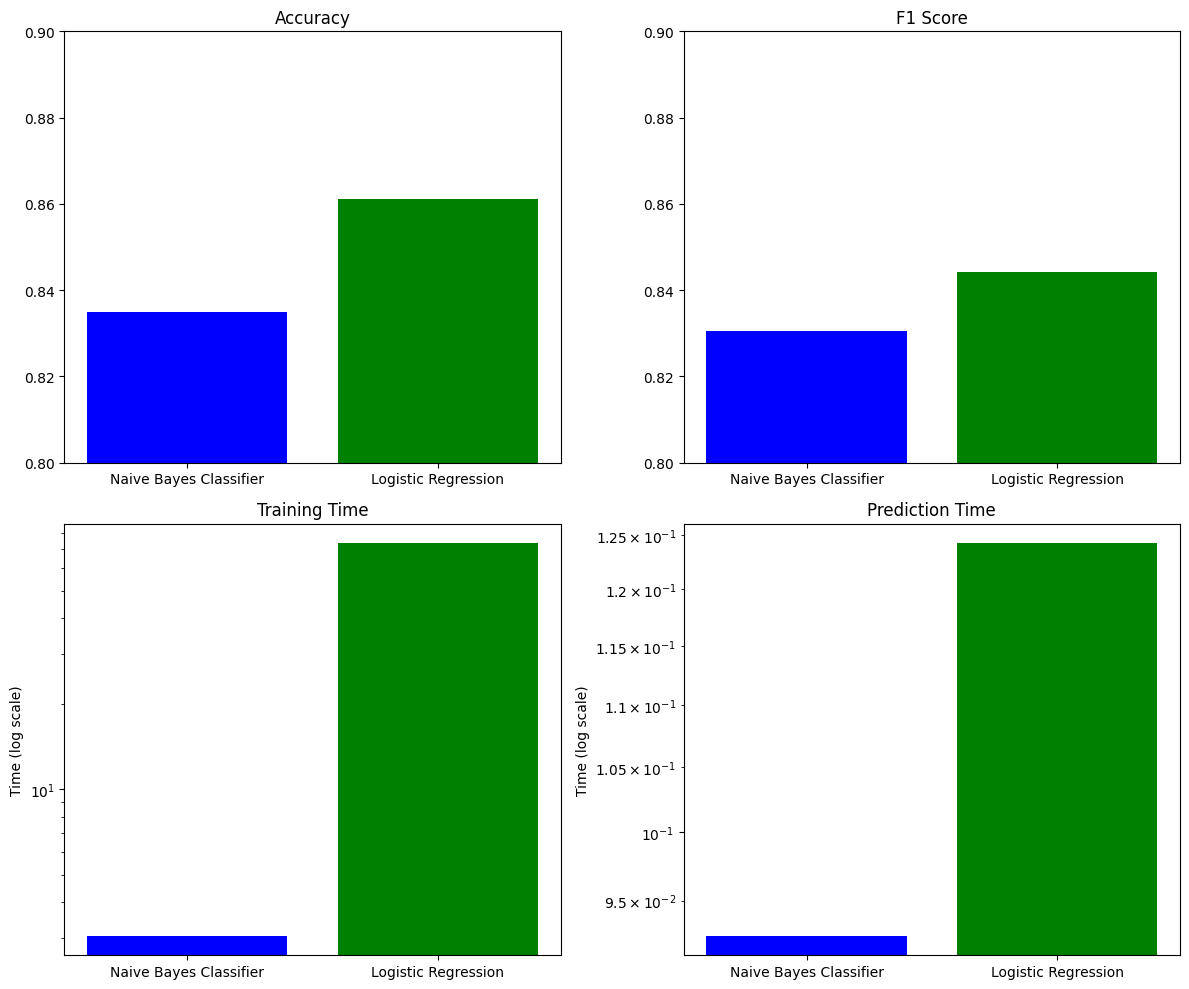

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Naive Bayes Classifier', 'Logistic Regression']
accuracy = [0.834942, 0.861224]
f1_score = [0.830586, 0.844282]
training_time = [3.048672, 73.403187]
prediction_time = [0.092530, 0.124183]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color=['blue', 'green'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.8, 0.9])

# F1 Score
axs[0, 1].bar(models, f1_score, color=['blue', 'green'])
axs[0, 1].set_title('F1 Score')
axs[0, 1].set_ylim([0.8, 0.9])

# Training Time
axs[1, 0].bar(models, training_time, color=['blue', 'green'])
axs[1, 0].set_title('Training Time')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('Time (log scale)')

# Prediction Time
axs[1, 1].bar(models, prediction_time, color=['blue', 'green'])
axs[1, 1].set_title('Prediction Time')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('Time (log scale)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## 3. Model should be light for deployment.


Logistic Regression is giving more accuracy compared to Naive Bayes but it is taking more time

## 4. Model should have very less latency.

Naive Baye's Classifier (MultinomialNB) is building a model with very less latency with approximately 5 seconds.